In [1]:
%matplotlib inline

import json
import glob
import re
import itertools
import functools

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
mpl.rc('font', family='Arial', size=12)

In [2]:
regions = pd.read_csv('regions_speed_hg19.bed', sep = '\t', 
                      names = ['chr', 'start', 'end', 'ucsc_name', 'region_type', 'strand'])

In [17]:
ok_seq = pd.read_csv('genome_correlations/ok_seq_rep_1.tsv', sep = '\t', 
                      names = ['chr', 'start', 'end', 'ucsc_name', 'region_type', 'strand', 'ok_1'])

ok_2 = pd.read_csv('genome_correlations/ok_seq_rep_2.tsv', sep = '\t', 
                      names = ['chr', 'start', 'end', 'ucsc_name', 'region_type', 'strand', 'ok_2'])
ok_seq['ok_2'] = pd.to_numeric(ok_2['ok_2'], errors='coerce')
ok_seq.loc[ok_seq.ok_1 == -2, 'ok_1'] = np.nan
ok_seq.loc[ok_seq.ok_2 == -2, 'ok_2'] = np.nan
ok_seq['ok_mean'] = (ok_seq.ok_1 + ok_seq.ok_2)/2

In [23]:
ok_seq.loc[ok_seq.strand == '-', 'ok_mean'] = -ok_seq.loc[ok_seq.strand == '-', 'ok_mean']
ok_seq.loc[ok_seq.strand == '-', 'ok_1'] = -ok_seq.loc[ok_seq.strand == '-', 'ok_1']
ok_seq.loc[ok_seq.strand == '-', 'ok_2'] = -ok_seq.loc[ok_seq.strand == '-', 'ok_2']

In [24]:
ok_seq.groupby('region_type').ok_mean.mean()

region_type
faster    0.238098
ns        0.140231
slower   -0.003672
Name: ok_mean, dtype: float64

In [47]:
ok_seq['direction'] = 'Mixed'
ok_seq.loc[ok_seq.ok_mean <= 0.3, 'direction'] = 'Head-On'
ok_seq.loc[ok_seq.ok_mean >= 0.3, 'direction'] = 'Co-Directional'

In [48]:
region_matrix = ok_seq.groupby(['region_type', 'direction']).size().unstack().T

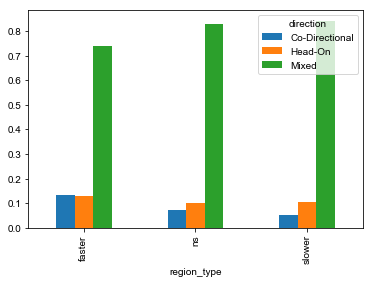

In [49]:
region_matrix.div(region_matrix.sum(axis=0), axis=1).T.plot.bar()

In [50]:
stats.chi2_contingency(region_matrix)

(125.98177065564583,
 2.815296955642152e-26,
 4,
 array([[  123.24137586,  1151.30426075,   225.45436339],
        [  167.85475392,  1568.07640314,   307.06884294],
        [ 1349.90387022, 12610.6193361 ,  2469.47679367]]))

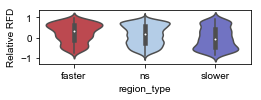

In [28]:
fig, ax = plt.subplots(figsize=(3.73,1.5))
sns.violinplot(
 x = 'region_type',
 y = 'ok_mean',
 data = ok_seq,
 order = ['faster', 'ns', 'slower'],
 palette=['#cf363f','#abcdef', '#6366cf']
)
ax.set_ylabel('Relative RFD')
fig.tight_layout()
fig.savefig('Ok_seq.svg')

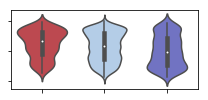

In [53]:
fig, ax = plt.subplots(figsize=(3,1.5))
sns.violinplot(
 x = 'region_type',
 y = 'ok_mean',
 data = ok_seq,
 order = ['faster', 'ns', 'slower'],
 palette=['#cf363f','#abcdef', '#6366cf']
)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_yticklabels('')
fig.tight_layout()
fig.savefig('Ok_seq_nolabel.svg', transparent=True)

In [31]:
stats.kruskal(ok_seq.loc[ok_seq.region_type == 'slower', 'ok_mean'].dropna(), 
              ok_seq.loc[ok_seq.region_type == 'ns', 'ok_mean'].dropna(), 
              ok_seq.loc[ok_seq.region_type == 'faster', 'ok_mean'].dropna())

KruskalResult(statistic=52.74174856804064, pvalue=3.525939169734893e-12)